In [2]:
from sys import version_info
version_info

sys.version_info(major=2, minor=7, micro=11, releaselevel='final', serial=0)

In [3]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')

In [4]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [17]:
import pandas.io.data as web
#from pandas_datareader import data as web
import pandas_datareader as pdr

In [18]:
path='/home/octo/Desktop/PyCon2016/'

In [19]:
#pdr.get_data_yahoo('NIFTYBEES.NS')
NB = web.DataReader(name='NIFTYBEES.NS', data_source='yahoo',start='2008-1-1')
NB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1925 entries, 2008-01-01 to 2016-07-15
Data columns (total 6 columns):
Open         1925 non-null float64
High         1925 non-null float64
Low          1925 non-null float64
Close        1925 non-null float64
Volume       1925 non-null int64
Adj Close    1925 non-null float64
dtypes: float64(5), int64(1)
memory usage: 105.3 KB


In [20]:
print(NB.head())

             Open    High    Low   Close  Volume  Adj Close
Date                                                       
2008-01-01  619.5  622.00  618.0  619.99    2200     608.42
2008-01-02  622.0  625.00  609.5  622.94   16100     611.31
2008-01-03  625.0  627.00  616.0  621.31    9700     609.71
2008-01-04  627.0  637.45  620.1  633.45    7100     621.63
2008-01-07  625.1  633.50  625.0  633.00   10400     621.18


In [21]:
print(NB.tail())

             Open    High     Low   Close  Volume  Adj Close
Date                                                        
2016-07-11  855.0  862.00  853.00  860.19   84100     860.19
2016-07-12  865.0  866.00  860.19  865.32   30100     865.32
2016-07-13  864.9  867.00  860.15  865.48  112700     865.48
2016-07-14  870.0  870.51  864.00  869.44   63400     869.44
2016-07-15  875.0  875.00  867.00  868.04   33000     868.04


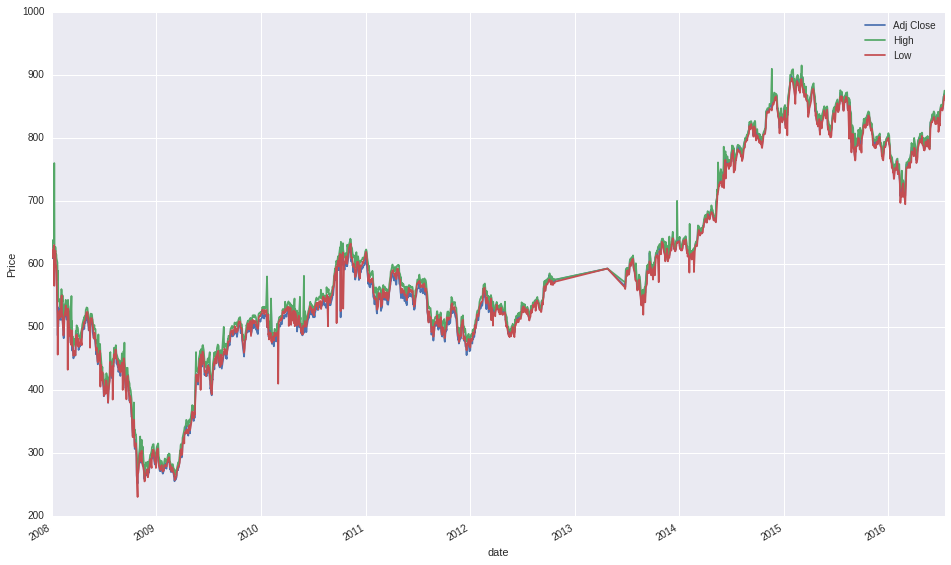

In [22]:
NB[['Adj Close','High','Low']].plot(figsize=(16, 10))
plt.xlabel('date')
plt.ylabel('Price')

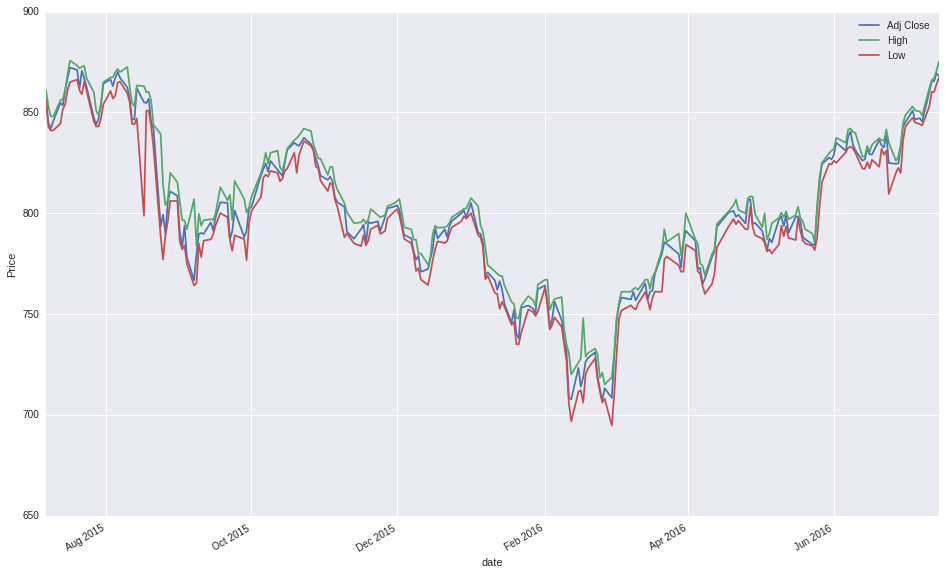

In [23]:
NB[['Adj Close','High','Low']].tail(250).plot(figsize=(16, 10))
plt.xlabel('date')
plt.ylabel('Price')

In [24]:
NB['Return'] = np.log(NB['Close'] /NB['Close'].shift(1))

In [25]:
NB.tail()

,Open,High,Low,Close,Volume,Adj Close,Return
Date,,,,,,,
2016-07-11,855.0,862.00,853.00,860.19,84100,860.19,0.017296
2016-07-12,865.0,866.00,860.19,865.32,30100,865.32,0.005946
2016-07-13,864.9,867.00,860.15,865.48,112700,865.48,0.000185
2016-07-14,870.0,870.51,864.00,869.44,63400,869.44,0.004565
2016-07-15,875.0,875.00,867.00,868.04,33000,868.04,-0.001612


In [26]:
#NB.boxplot()

In [27]:
#NBg = web.DataReader('NIFTYBEES', data_source='google')# effective for Indian stock?

In [28]:
  # reads data from Google Finance
NB['14d'] = pd.rolling_mean(NB['Close'], 14)
NB['42d'] = pd.rolling_mean(NB['Close'], 42)
  # 42d and 252d trends

In [29]:
NB.tail()

,Open,High,Low,Close,Volume,Adj Close,Return,14d,42d
Date,,,,,,,,,
2016-07-11,855.0,862.00,853.00,860.19,84100,860.19,0.017296,839.327857,823.419048
2016-07-12,865.0,866.00,860.19,865.32,30100,865.32,0.005946,841.595000,825.126905
2016-07-13,864.9,867.00,860.15,865.48,112700,865.48,0.000185,843.942143,826.707857
2016-07-14,870.0,870.51,864.00,869.44,63400,869.44,0.004565,846.076429,828.593810
2016-07-15,875.0,875.00,867.00,868.04,33000,868.04,-0.001612,849.159286,830.260476


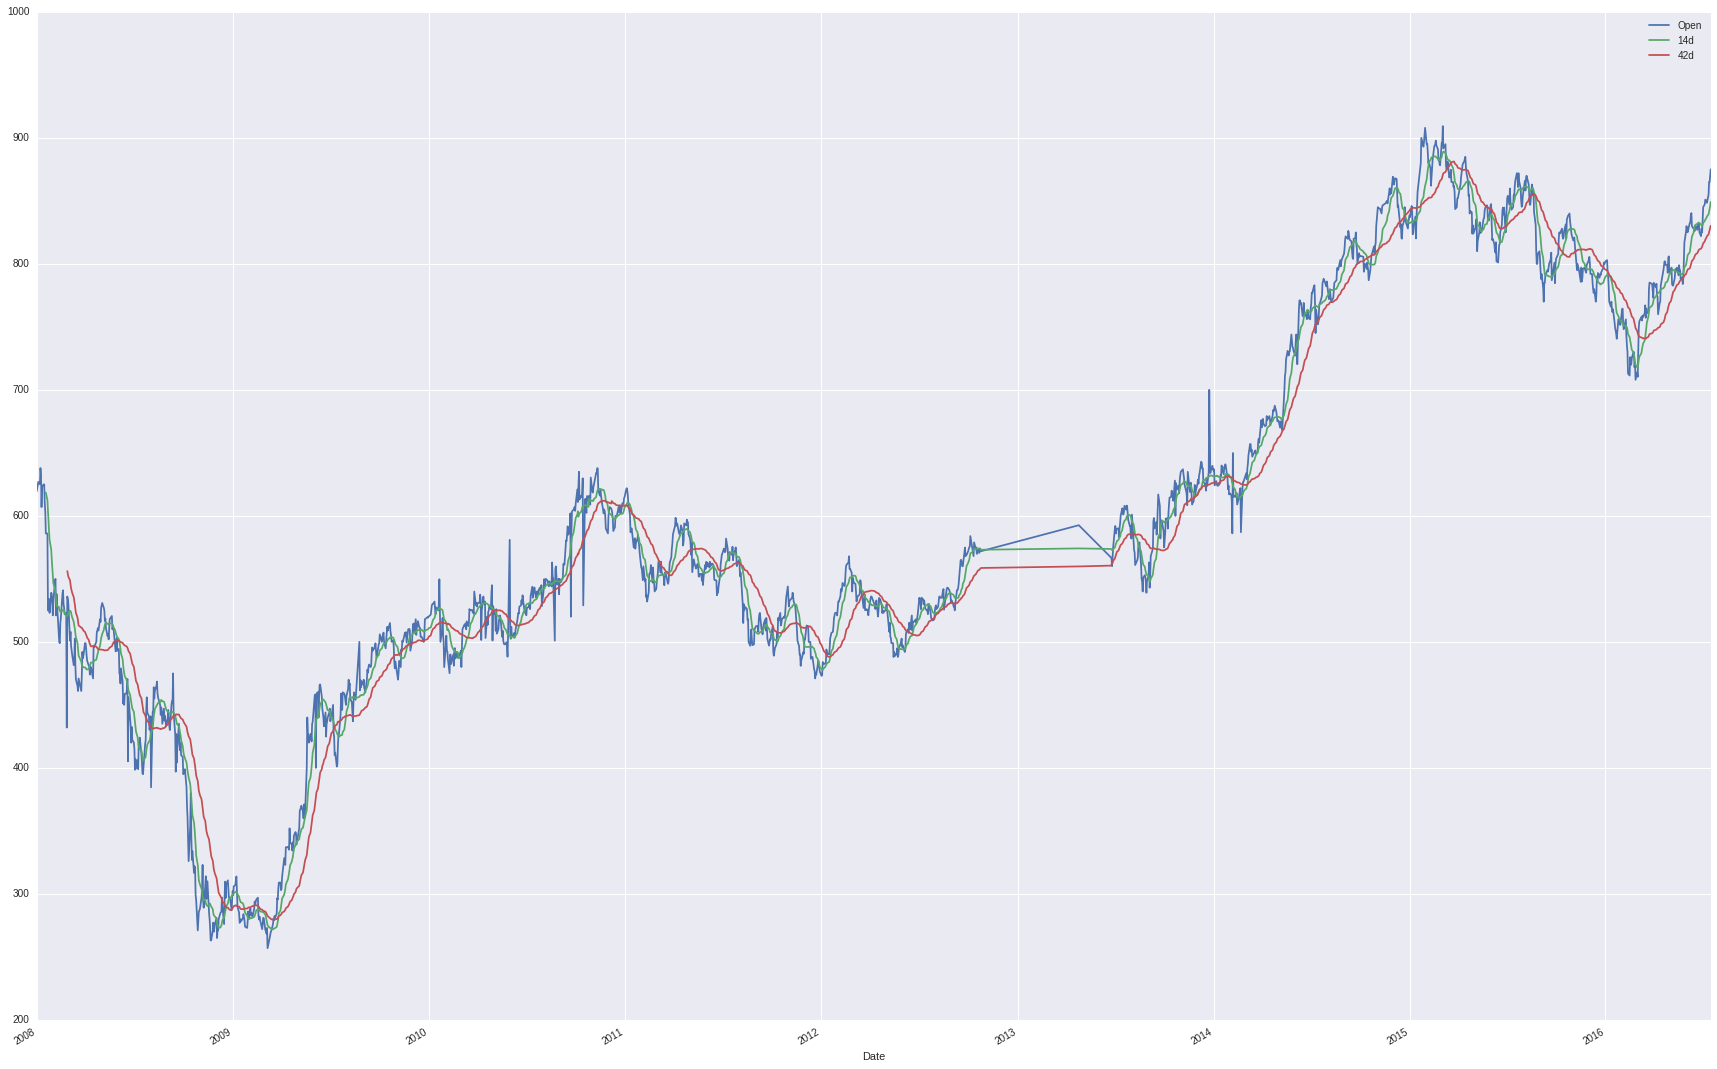

In [30]:
NB[['Open', '14d', '42d']].plot(figsize=(30,20), grid=True);

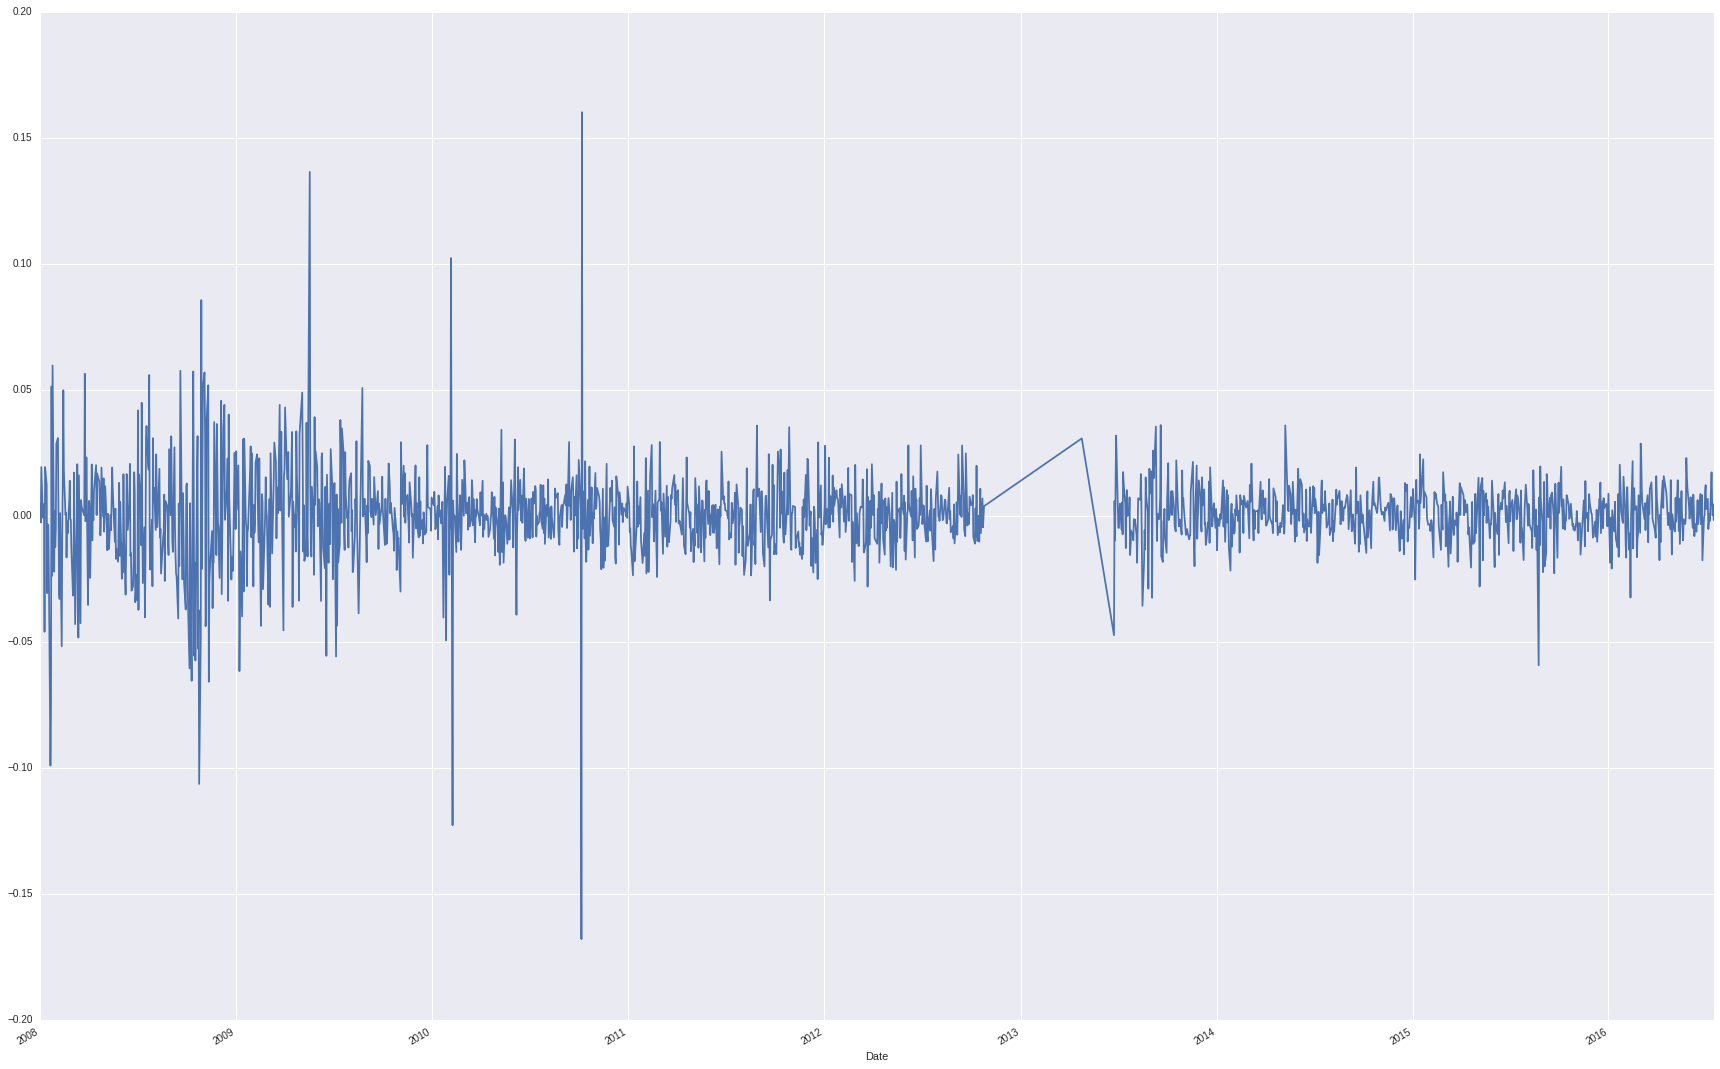

In [31]:
NB['Return'].plot(figsize=(30,20), grid=True); 

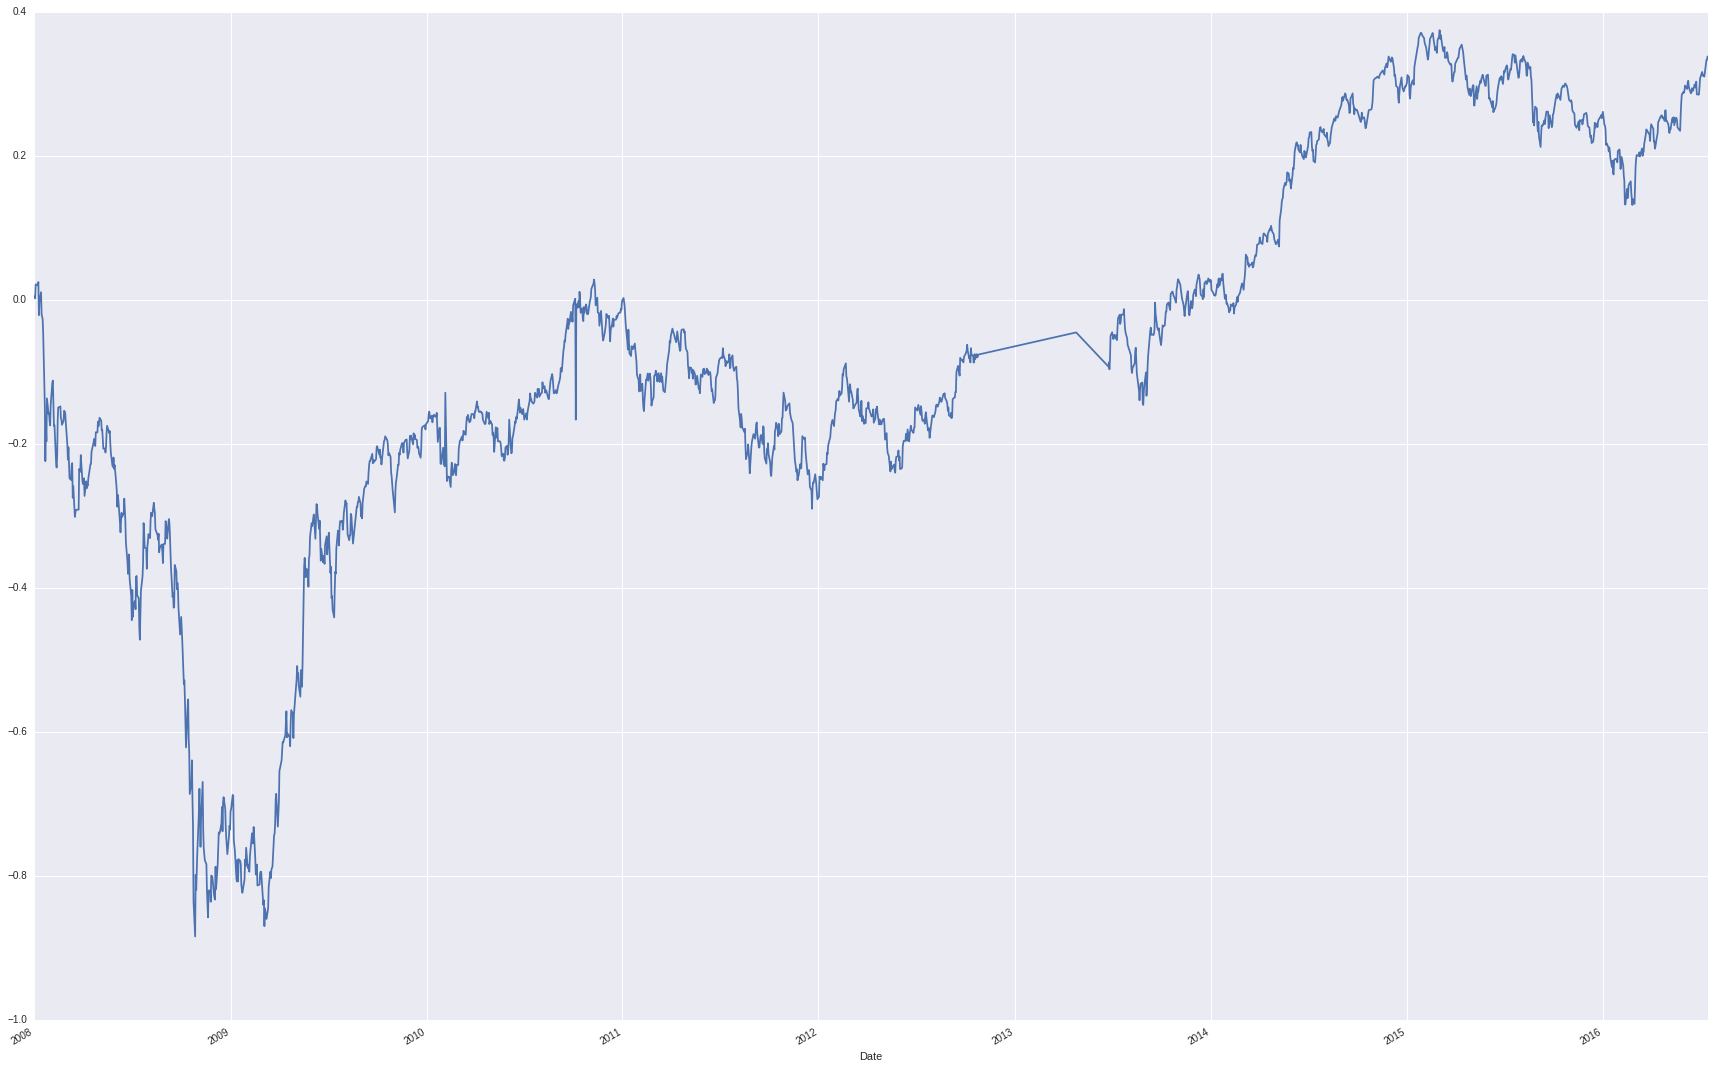

In [32]:
np.cumsum(NB['Return']).plot(figsize=(30,20), grid=True); 

http://people.duke.edu/~rnau/411home.htm

http://www.johnwittenauer.net/a-simple-time-series-analysis-of-the-sp-500-index/

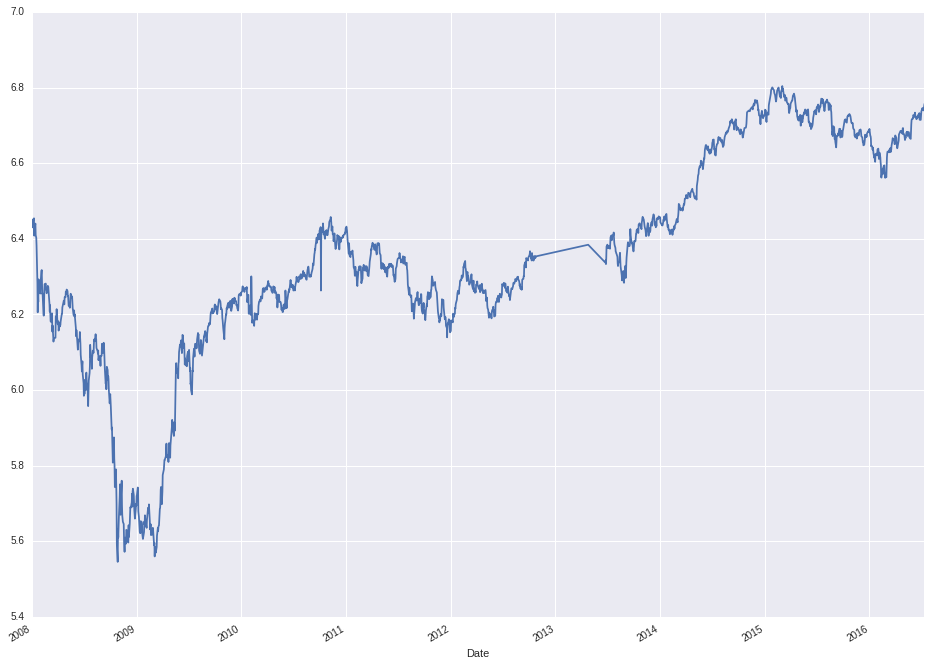

In [70]:
NB['Log Return'] = NB['Close'].apply(lambda x: np.log(x))  
NB['Log Return'].plot(figsize=(16, 12))

In [73]:
NB['Variance'] = pd.rolling_var(NB['Close'], 30, min_periods=None, freq=None, center=True)  
NB['Log Variance'] = pd.rolling_var(NB['Log Return'], 30, min_periods=None, freq=None, center=True)

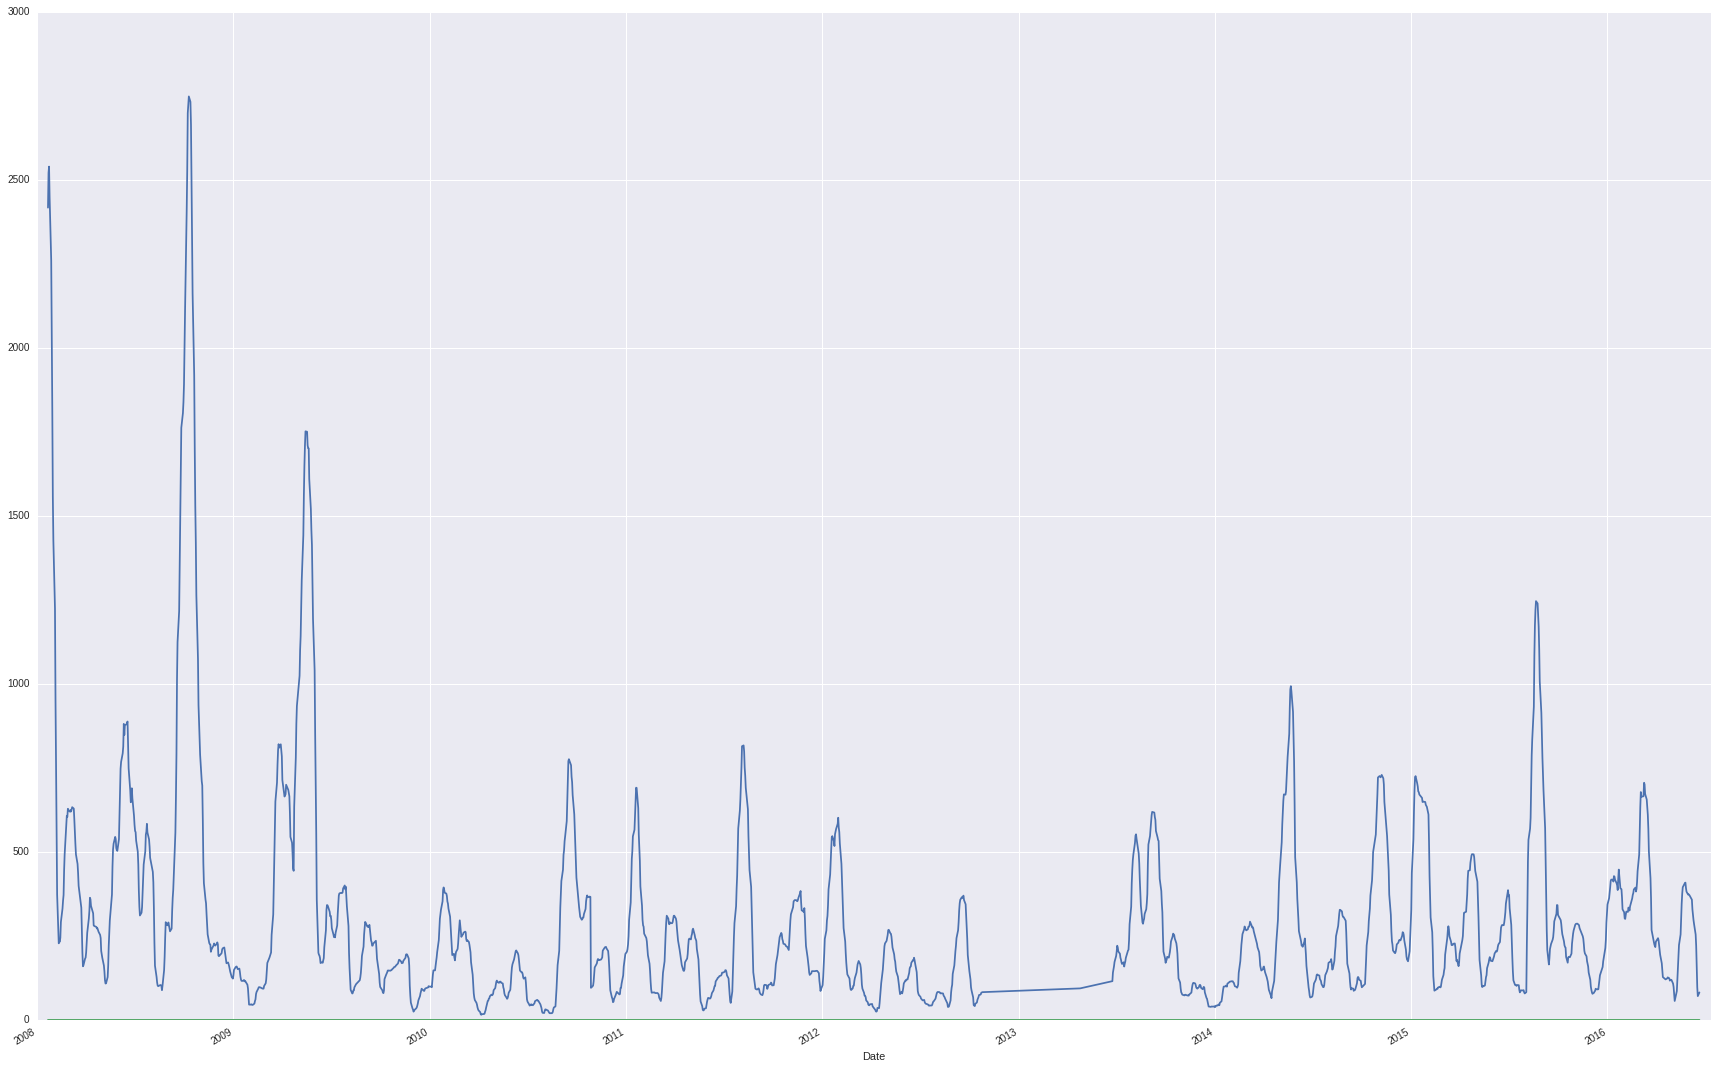

In [77]:
NB['Variance'].plot(figsize=(30,20), grid=True);

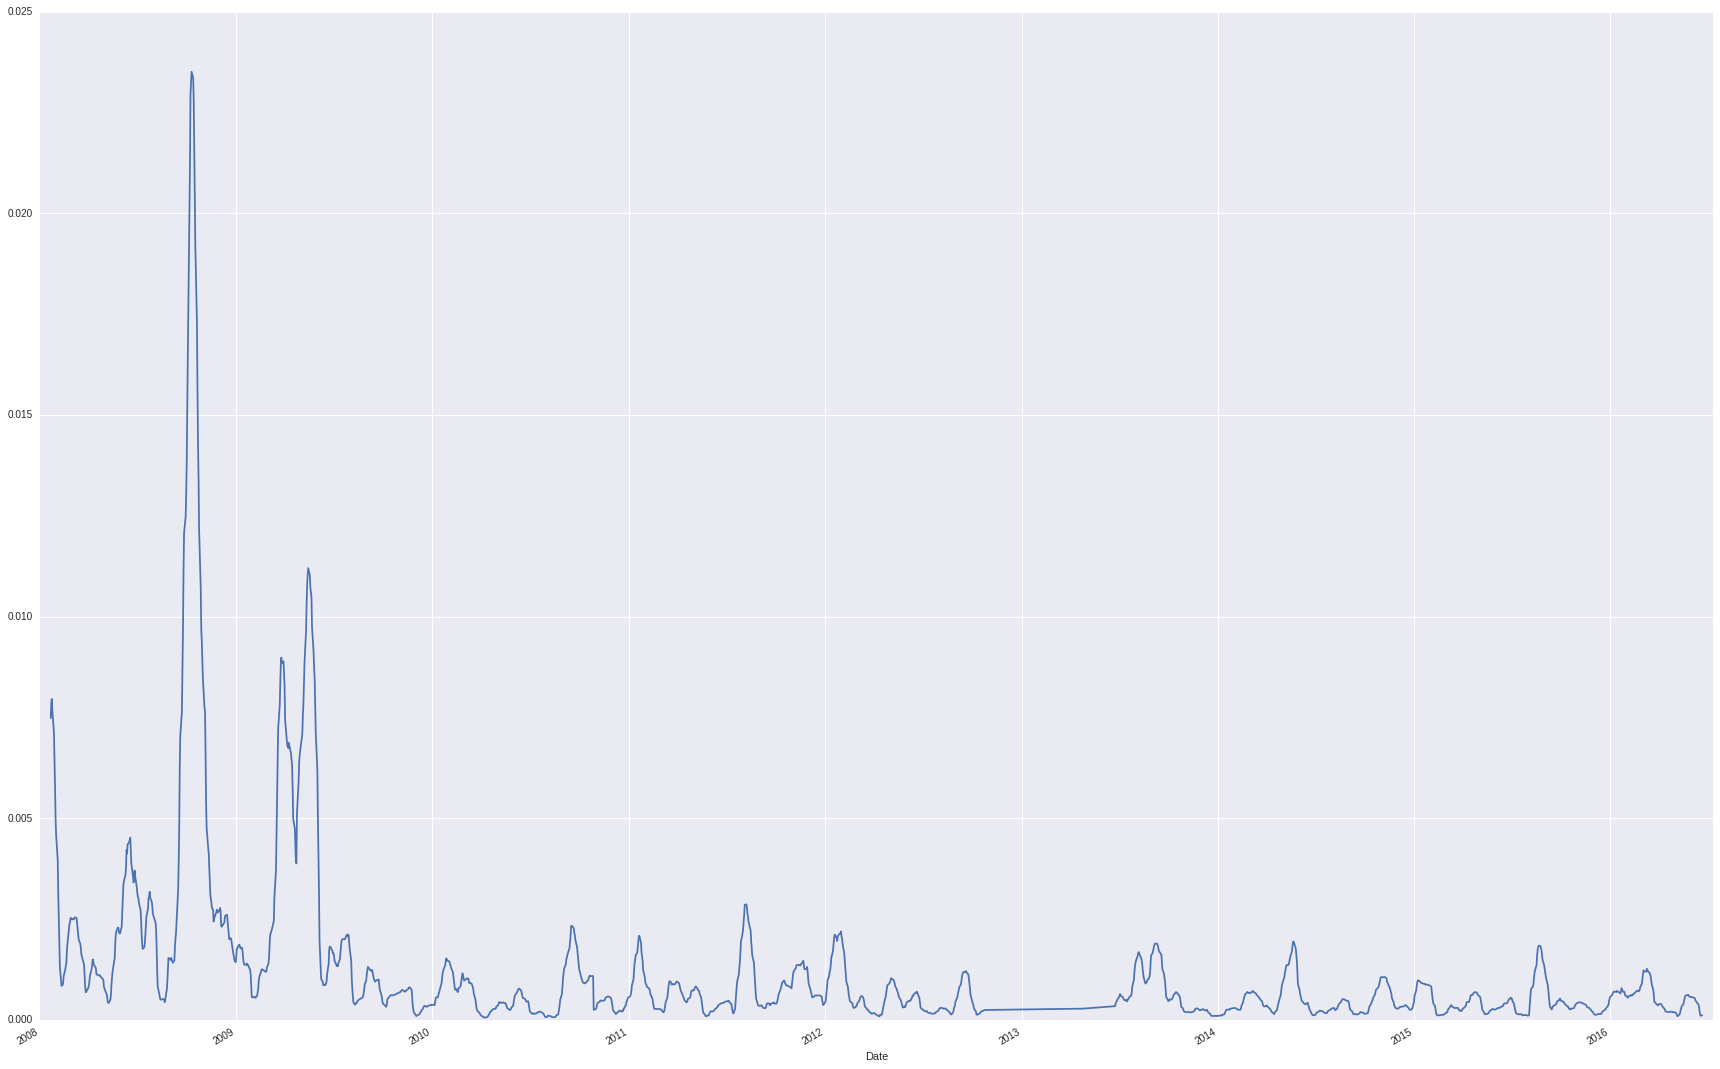

In [78]:
NB['Log Variance'].plot(figsize=(30,20), grid=True);

In [81]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose 

In [ ]:
lag_correlations = acf(stock_data['Logged First Difference'].iloc[1:])  
lag_partial_correlations = pacf(stock_data['Logged First Difference'].iloc[1:])  

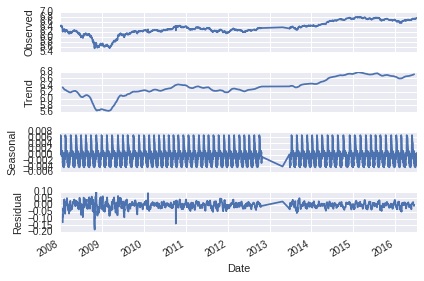

In [82]:
decomposition = seasonal_decompose(NB['Log Return'], model='additive', freq=30)  
fig = plt.figure()  
fig = decomposition.plot() 

In [47]:
f = lambda x: x['Return']>0.05

In [56]:
NB['UD']  = np.where(NB['Return']>0.02, 'JU2','O')

In [64]:
NB['UD']  = np.where(NB['Return']>0.01, 'JU1','O')

In [61]:
NB['UD']  = np.where(NB['Return']>0.0, 'U','O')

In [59]:
NB.tail()

,Open,High,Low,Close,Volume,Adj Close,Return,14d,42d,JU,UD
Date,,,,,,,,,,,
2016-07-04,847.43,852.90,847.43,850.89,49400,850.89,0.006769,834.134286,817.911905,O,O
2016-07-05,851.00,851.00,845.00,846.46,52800,846.46,-0.005220,835.172857,819.320238,O,O
2016-07-07,849.99,850.41,844.19,847.11,31000,847.11,0.000768,836.452857,820.786190,O,O
2016-07-08,848.50,848.50,843.50,845.44,24300,845.44,-0.001973,837.622143,821.945952,O,O
2016-07-11,855.00,862.00,853.00,860.19,84100,860.19,0.017296,839.327857,823.419048,O,O


In [65]:
grouped = NB.groupby('UD')

In [66]:
grouped.size()

UD
JU1     355
O      1566
dtype: int64

In [54]:
grouped.filter(NB['JU']).head()

TypeError: 'Series' object is not callable

In [46]:
NB.filter(lambda x: x['Return']>0.05)

TypeError: 'function' object is not iterable

In [ ]:
df['Gr2']  = np.where(f(df.index), 'JU', 'odd')
grouped.filter(lambda x: np.mean(x['No2']) > 0.0).head()